In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_df = pd.read_csv("../data/train_2016.csv", parse_dates=["transactiondate"])
train_df.shape

(90811, 3)

In [3]:
train_df.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

In [4]:
prop_df = pd.read_csv("../data/properties_2016.csv")
prop_df.shape

C:\Anaconda3\envs\zillow-prize\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [5]:
prop_df.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid         ...           numberofstories  \
0                NaN         NaN         ...                       NaN   
1                NaN         NaN         ...                       NaN   
2                NaN         NaN         ...                       NaN   
3                NaN         NaN         ...                       1.0   
4                NaN         NaN         ...                       NaN   

   fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0            NaN                         NaN                9.0   
1            NaN                         NaN            27516.0   
2            NaN                    650756.0          1413387.0   
3            NaN                    571346.0          1156834.0   
4            NaN                    193796.0           433491.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0          2015.0                    9.0        NaN                 NaN   
1          2015.0                27516.0        NaN                 NaN   
2          2015.0               762631.0   20800.37                 NaN   
3          2015.0               585488.0   14557.57                 NaN   
4          2015.0               239695.0    5725.17                 NaN   

   taxdelinquencyyear  censustractandblock  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 58 columns]

In [27]:
varlist = ["airconditioningtypeid", "architecturalstyletypeid"]

var_domain = {
    "airconditioningtypeid" :{
        -1 : "Missing",
        1 : 'Central',
        2 : 'Chilled Water',
        3 : 'Evaporative Cooler',
        4 : 'Geo Thermal',
        5 : 'None',
        6 : 'Other',
        7 : 'Packaged AC Unit',
        8 : 'Partial',
        9 : 'Refrigeration',
        10 : 'Ventilation',
        11 : 'Wall Unit',
        12 : 'Window Unit',
        13 : 'Yes'
    },
    "architecturalstyletypeid" : {
        -1 : 'Missing',
        1 : 'A-Frame',
        2 : 'Bungalow',
        3 : 'Cape Cod',
        4 : 'Cottage',
        5 : 'Colonial',
        6 : 'Custom',
        7 : 'Contemporary',
        8 : 'Conventional',
        9 : 'Dome',
        10 : 'French Provincial',
        11 : 'Georgian',
        12 : 'High Rise',
        13 : 'Historical',
        14 : 'Log Cabin/Rustic',
        15 : 'Mediterranean',
        16 : 'Modern',
        17 : 'Mansion',
        18 : 'English',
        19 : 'Other',
        20 : 'Prefab',
        21 : 'Ranch/Rambler',
        22 : 'Raised Ranch',
        23 : 'Spanish',
        24 : 'Traditional',
        25 : 'Tudor',
        26 : 'Unfinished/Under Construction',
        27 : 'Victorian'        
    }
}

In [14]:
ct_dict = {}

for var in varlist:
    print(var)
    ct_dict[var] = pd.crosstab(
        index = prop_df[var].apply(lambda x: "missing" if np.isnan(x) else var_domain[var][x]), 
        columns="count"
    )

airconditioningtypeid
architecturalstyletypeid


In [71]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output, display

%matplotlib inline

w = widgets.Dropdown(
    options=varlist,
    value=varlist[0],
    description='Variable:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)

@interact(var=w)
def plotvar(var):
    ax = sns.barplot(
        y=ct_dict[var].index, 
        x=ct_dict[var]["count"],
        orient="h",
        order = ct_dict[var].sort_values(by="count",ascending=False).index
    )
    ax = ax.set(xlabel = "Frequency", ylabel = "Variable")    
    plt.show()

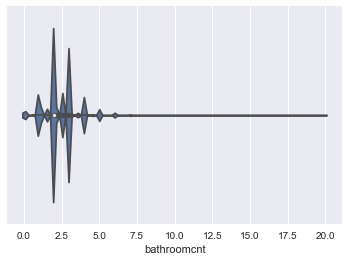

In [61]:
sns.violinplot(x="bathroomcnt",data=prop_df)

C:\Anaconda3\envs\zillow-prize\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


KeyboardInterrupt: 

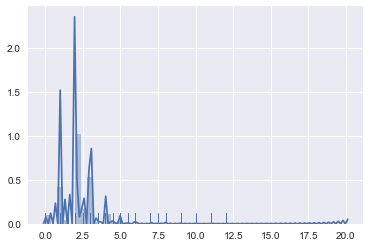

In [70]:
sns.distplot(prop_df["bathroomcnt"].dropna(),rug=True)